# Testing the trained Log - Log 14th Degree Poly model

# Test on psm 2017 Data

In [31]:
#IMPORTS
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import pylab as py
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
print(os.listdir())

['statistical_irradience_modeling 8.ipynb', '.statistical_irradience_modeling.ipynb.icloud', 'data_munger.py', 'Testing_Data', 'statistical_irradience_modeling.ipynb', '.DS_Store', '.statistical_irradience_modeling 6.ipynb.icloud', '.Data_Viz 2.ipynb.icloud', 'statistical_irradience_modeling 9.ipynb', 'Log_Log_Polynomial_clf.joblib', 'Raw_Data', 'README.md', '.statistical_irradience_modeling 2.ipynb.icloud', '.statistical_irradience_modeling 5.ipynb.icloud', 'scratch', 'Log_Polynomial_clf.joblib', 'psm_VA_Charlottesville2018cloud_output.csv', '.statistical_irradience_modeling 4.ipynb.icloud', '.statistical_irradience_modeling 3.ipynb.icloud', 'Polynomial_clf.joblib', 'statistical_irradience_modeling 7.ipynb', 'Model_Testing_psm.ipynb', '.ipynb_checkpoints', 'OLS_log_log_clf.joblib', '.git']


In [32]:
#Time for Polynomial Fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error
#Okay none of these are super good. Lets do a boxcox transformation
from sklearn.preprocessing import power_transform

In [33]:
_Curr_Dir = os.getcwd()
_Testing_Data_Dir = os.path.join(_Curr_Dir, 'Testing_Data')
print(_Curr_Dir)
print(_Testing_Data_Dir)
# data_path = os.path.join(curr_dir, 'Data_Files', 'Testing_Data')
# print(os.listdir(data_path))

/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor
/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data


In [34]:
def logify_df(df):
    df['DHI_log'] = np.log(df['DHI'])
    df['GHI_log'] = np.log(df['GHI'])
    df['cloud_cover_log'] = np.log(df['Cloud Cover']+0.0000001)
    return df

In [35]:
def make_df_nonzero(df):
    df_no_zero = df.loc[df['DHI']!= 0 ]
    assert len(df_no_zero['DHI'])==len(df_no_zero['GHI']), "Some DHI 0s where GHI is not 0"
    print(df_no_zero)
    return df_no_zero 

In [36]:
def meta_visualization(data, x='GHI', y='DHI', z='Cloud Cover'):
    sns.lmplot(x, y, data=data, hue=z, fit_reg=False)
    plt.show()
    return

In [37]:
def featureHistograms(df, features=['GHI','DHI','Cloud Cover'],):
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(ncols=len(features))
    for i in range(len(features)):
        sns.distplot(df[features[i]], ax=axs[i])

In [38]:
def runPolyModel(X, Y, model, degrees=14):
    poly = PolynomialFeatures(degree=degrees)
    _X_poly = poly.fit_transform(X)
    result = show_model_metrics(_X_poly, Y, model)
    return result[0], result[1]
    

In [107]:
def show_model_metrics(X, Y, model):
    preds = model.predict(X)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("****MODEL METRICS*****")
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    try:
        print("mean squared log error is ", mean_squared_log_error(Y, preds))
    except:
        print("median absolute error is ", median_absolute_error(Y, preds))
        print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [108]:
def show_model_metrics_logBackTrans(X, Y, model):
    preds = model.predict(X)
    preds = np.exp(preds)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("******LOG BACK TRANSFORMED METRICS")
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    print("mean squared log error is ", mean_squared_log_error(Y, preds))
    print("median absolute error is ", median_absolute_error(Y, preds))
    print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [41]:
def three_dee_viz(x,y,z,preds=[]):
    #3d viz
    fig = pyplot.figure()
    ax = Axes3D(fig)
    ax.set(xlabel='arg1', ylabel='arg2', zlabel='arg3')
    ax.scatter(x,y,z)
    if any(preds):
        ax.scatter(x, preds,z)
    plt.show()

In [42]:
def initPolyModel(X, degrees=5):
    poly = PolynomialFeatures(degree=degrees)
    _X_poly = poly.fit_transform(X)
    return _X_poly

In [43]:
def show_model_metrics(X, Y, model):
    preds = model.predict(X)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    try:
        print("mean squared log error is ", mean_squared_log_error(Y, preds))
    except:
        pass
    print("median absolute error is ", median_absolute_error(Y, preds))
    print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [44]:
#Load the model

In [142]:
from joblib import dump, load
clf_log_log_poly = load("Log_Log_Polynomial_clf.joblib")

print(clf_log_log_poly)
print(type(clf_log_log_poly))
print(clf_log_log_poly.intercept_)
print(clf_log_log_poly.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.03813301661493895
[ 0.00000000e+00  1.13173390e+00  6.48804596e-02 -2.24856838e-01
 -1.08815393e-01  1.09121819e-01  1.00055290e-01  7.04064560e-02
  2.47889391e-02  7.29533807e-02 -1.66462843e-02 -6.93044561e-03
 -7.86819765e-04 -1.43880878e-03  1.09759801e-02  8.09468249e-04
 -1.34202901e-04 -5.04237074e-04 -3.27036609e-04 -2.10783445e-04
  4.25245749e-04]


In [47]:
#Load data
#2017 psm data
# Lat/lon: 43.85, -99.5

df1_psm_2017= pd.read_csv(os.path.join(_Testing_Data_Dir, 'psm_testing_data2017.csv'))
#Remove Zeros
df1_psm_2017 = make_df_nonzero(df1_psm_2017)
df1_psm_2017['Cloud Cover'] = df1_psm_2017['Cloud Cover'].apply(lambda x: x+0.00001)
#Logify
df1_psm_2017 = logify_df(df1_psm_2017)
print(df1_psm_2017['cloud_cover_log'])

      Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
14    2017      1    1    14      30           -9            14           238   
15    2017      1    1    15      30           -7            47           614   
16    2017      1    1    16      30           -5            66           753   
17    2017      1    1    17      30           -3            78           809   
18    2017      1    1    18      30           -1            86           815   
...    ...    ...  ...   ...     ...          ...           ...           ...   
8754  2017     12   31    18      30          -18            73           926   
8755  2017     12   31    19      30          -18            70           923   
8756  2017     12   31    20      30          -18            62           884   
8757  2017     12   31    21      30          -18            49           786   
8758  2017     12   31    22      30          -20            27           541   

      Clearsky GHI  Cloud T

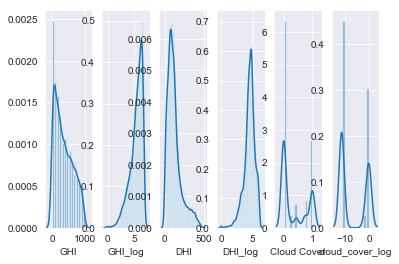

In [48]:
featureHistograms(df1_psm_2017, ['GHI', 'GHI_log', 'DHI', 'DHI_log', 'Cloud Cover', 'cloud_cover_log'])

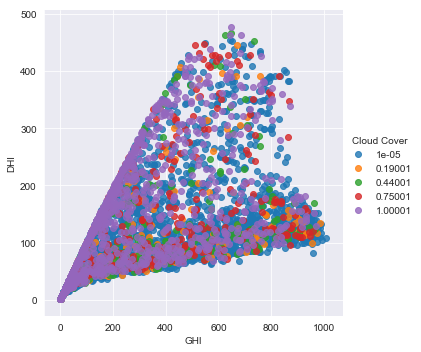

In [49]:
#Check the data out
meta_visualization(df1_psm_2017)

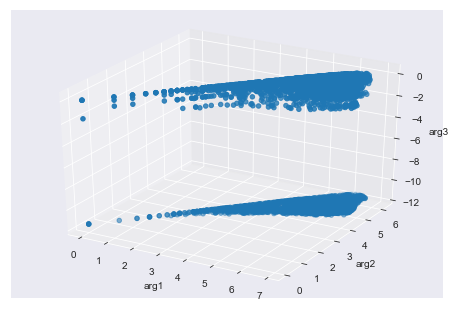

In [50]:
#And now with logs
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['cloud_cover_log'])

In [143]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['cloud_cover_log'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf_log_log_poly)

****MODEL METRICS*****
rmse is  13.055459551334755
r2 is  -227.12348246050587
mean absolute error is  10.052059264020427
median absolute error is  16.182487897578078
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


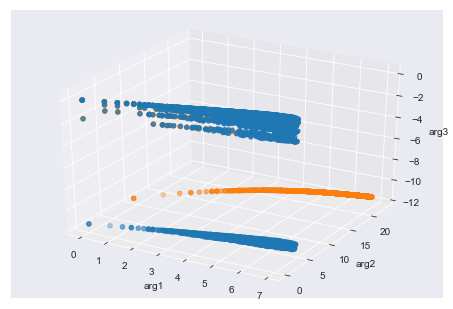

In [52]:
three_dee_viz(df1_psm_2017['GHI_log'],df1_psm_2017['DHI_log'], df1_psm_2017['cloud_cover_log'], preds)

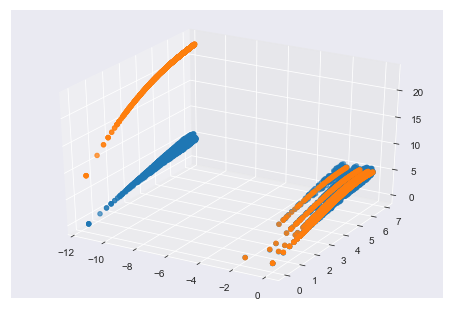

In [53]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(df1_psm_2017['cloud_cover_log'],df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'])
ax.scatter(df1_psm_2017['cloud_cover_log'],df1_psm_2017['GHI_log'], preds)
plt.show()

In [54]:
#Something is OFF

In [144]:
Y_actual = df1_psm_2017['DHI']
preds = np.exp(preds)
rmse = np.sqrt(mean_squared_error(Y_actual,preds))
r2 = r2_score(Y_actual,preds)
print("rmse is ", rmse)
print("r2 is ",r2)
print("mean absolute error is ",mean_absolute_error(Y_actual,preds))
# print("mean squared log error is ", mean_squared_log_error(Y, preds))
print("median absolute error is ", median_absolute_error(Y_actual, preds))
print("MAPE is ", np.mean(np.abs((Y_actual - preds) / Y_actual)) * 100)


rmse is  3924022822.7051477
r2 is  -1860870744205936.5
mean absolute error is  2481981170.5250463
median absolute error is  530173166.0934728
MAPE is  2270839343.88784


In [56]:
#Yup, way OFF

In [57]:
#THEORY: Log transform of Cloud Cover causes huge loss in cloud cover data explanability

In [58]:
#Lets use normal cloud cover values

In [145]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['Cloud Cover'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf_log_log_poly)

****MODEL METRICS*****
rmse is  0.5586803292205768
r2 is  0.5822538785161409
mean absolute error is  0.45433801622246855
mean squared log error is  0.010039376996711029


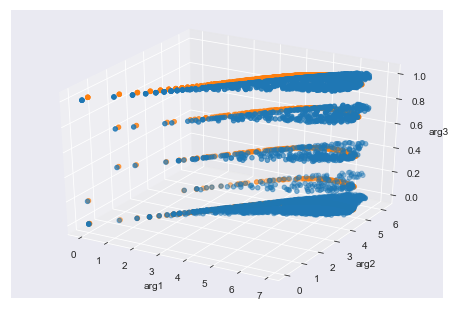

In [61]:
three_dee_viz(df1_psm_2017['GHI_log'],df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'], preds)

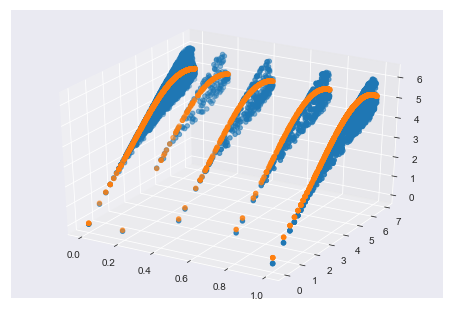

In [62]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(df1_psm_2017['Cloud Cover'],df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'])
ax.scatter(df1_psm_2017['Cloud Cover'],df1_psm_2017['GHI_log'], preds)
plt.show()

In [63]:
#Lets try with a different model, lets make sure cloud cover is NOT log transformed

In [146]:
show_model_metrics_logBackTrans(X, df1_psm_2017['DHI'], clf_log_log_poly )

******LOG BACK TRANSFORMED METRICS
rmse is  78.16198025048439
r2 is  0.26168062309134454
mean absolute error is  58.35218280945155
mean squared log error is  0.30529216908665074
median absolute error is  46.289080090313576
MAPE is  61.784339536341605


(array([ 21.15207879, 113.2514475 , 147.90671757, ..., 154.98298108,
        135.80907364,  67.73795741]),
 14      -7.152079
 15     -66.251448
 16     -81.906718
 17       9.403536
 18      37.998910
           ...    
 8754   -95.645346
 8755   -89.137343
 8756   -92.982981
 8757   -86.809074
 8758   -40.737957
 Name: DHI, Length: 4346, dtype: float64)

## Polynomial fit in log-log except Cloud Data

In [86]:
clf_poly_2 = load("Log_Polynomial_clf.joblib")

print(clf_poly_2)
print(type(clf_poly_2))
print(clf_poly_2.intercept_)
print(clf_poly_2.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.06544720351050781
[ 0.00000000e+00  1.06027039e+00 -1.35714898e+00 -1.43103090e-01
  1.64447112e-01  1.20982874e+01  6.62570523e-02 -2.72246070e-01
  1.62293207e+00 -3.86047516e+01 -1.28981345e-02  5.95068820e-02
  9.47386146e-02 -3.09561442e+00  4.84206590e+01  7.55433813e-04
 -4.16384739e-03 -1.28236684e-02  2.98119585e-02  1.48411244e+00
 -2.06266485e+01]


In [117]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['Cloud Cover'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf_poly_2)

****MODEL METRICS*****
rmse is  0.45941989959298574
r2 is  0.7175085741097325
mean absolute error is  0.3662556299390973
median absolute error is  0.3117229143788647
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


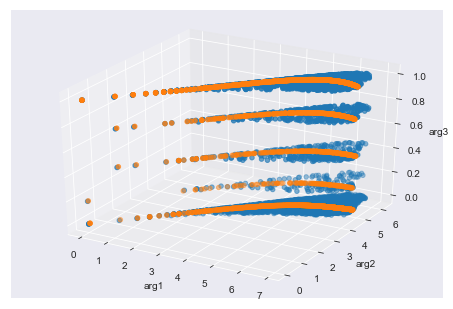

In [118]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'],preds)

In [120]:
preds, resids = show_model_metrics_logBackTrans(X,df1_psm_2017['DHI'],clf_poly_2)

******LOG BACK TRANSFORMED METRICS
rmse is  76.21470653615158
r2 is  0.2980103285014444
mean absolute error is  48.295473045458785
mean squared log error is  0.20721238204952475
median absolute error is  30.124736463863158
MAPE is  36.93472144314497


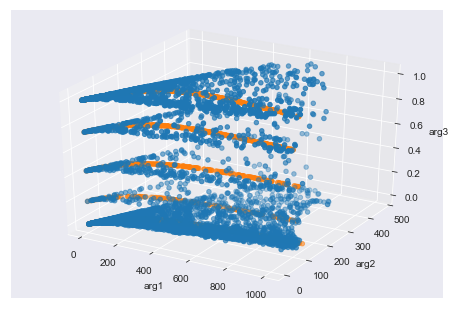

In [121]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI'], df1_psm_2017['Cloud Cover'],preds)

## Polynomial fit in log data 

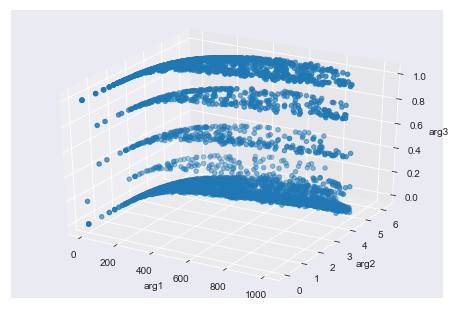

In [122]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'])

In [123]:
#Load model

In [124]:
clf_poly = load("Models/Polynomial_clf.joblib")

print(clf_poly)
print(type(clf_poly))
print(clf_poly.intercept_)
print(clf_poly.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
1.7789789044331203
[ 0.00000000e+00  4.10931067e-02  8.25022070e-02 -2.10323379e-04
  1.25931767e-04  3.23971458e-02  4.78464016e-07 -7.89474301e-06
  1.09172396e-02 -2.14491774e-04 -4.89035238e-10  1.21042036e-08
  1.45345267e-06 -1.90833226e-02 -2.21119292e-02  1.83560675e-13
 -7.60606215e-12  2.43441387e-09 -4.04026927e-06  1.11572334e-02
 -3.74068568e-02]


In [125]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI'].values, df1_psm_2017['Cloud Cover'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf_poly)

****MODEL METRICS*****
rmse is  0.4886969939368489
r2 is  0.6803571451494024
mean absolute error is  0.3942171508027232
mean squared log error is  0.009854842073433994


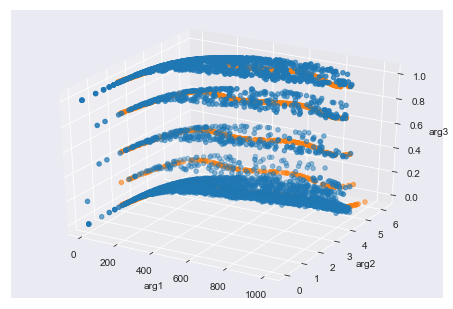

In [126]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'],preds)

In [127]:
preds_backtrans, resids = show_model_metrics_logBackTrans(X, df1_psm_2017['DHI'], clf_poly)

******LOG BACK TRANSFORMED METRICS
rmse is  76.29705114901704
r2 is  0.2964926084310744
mean absolute error is  49.021369499992026
mean squared log error is  0.22945558163653243
median absolute error is  29.77718066445332
MAPE is  40.79627272587239


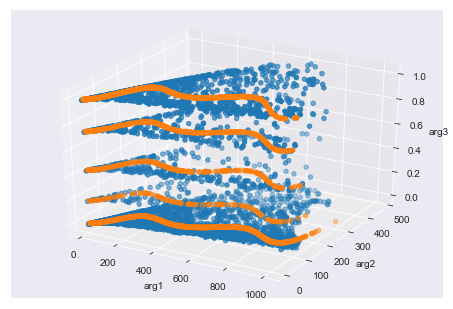

In [128]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI'], df1_psm_2017['Cloud Cover'],preds_backtrans)

## OLS in Log-Log model

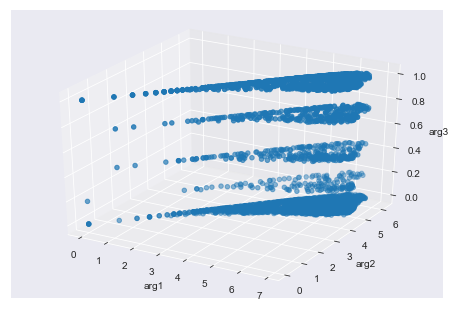

In [132]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'])

In [134]:
clf_OLS_log_log = load("Models/OLS_log_log_clf.joblib")

print(clf_OLS_log_log)
print(type(clf_OLS_log_log))
print(clf_OLS_log_log.intercept_)
print(clf_OLS_log_log.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.9351297431441159
[0.62767233 0.3428279 ]


In [136]:
X = list(zip(df1_psm_2017['GHI_log'], df1_psm_2017['Cloud Cover']))
Y = df1_psm_2017['DHI_log']
preds, resids = show_model_metrics(X, Y, clf_OLS_log_log)

****MODEL METRICS*****
rmse is  0.49730498019801517
r2 is  0.6689974934583722
mean absolute error is  0.4213511833877614
mean squared log error is  0.008923738931120785


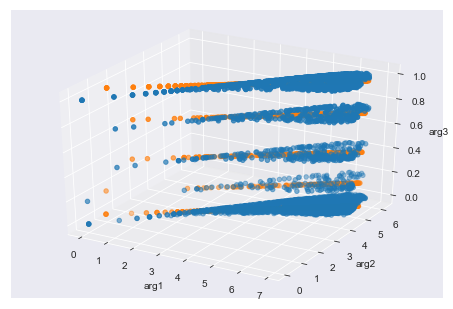

In [137]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'], preds)

In [140]:
preds, resids = show_model_metrics_logBackTrans(X, df1_psm_2017['DHI'], clf_OLS_log_log)

******LOG BACK TRANSFORMED METRICS
rmse is  77.49802345225432
r2 is  0.27417084105797596
mean absolute error is  54.044979015005886
mean squared log error is  0.24023805977893728
median absolute error is  39.23905483806014
MAPE is  41.47842026451529


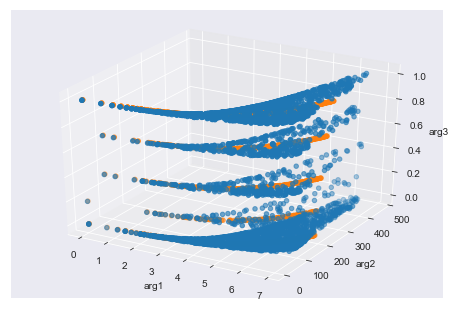

In [141]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI'], df1_psm_2017['Cloud Cover'], preds)

## WLS Log - Log Model

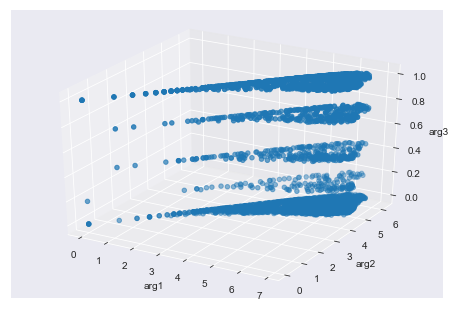

In [147]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'])

In [148]:
clf_wls_log_log = load("Models/Log_WLS_clf.joblib")

print(clf_wls_log_log)
print(type(clf_wls_log_log))
print(clf_wls_log_log.intercept_)
print(clf_wls_log_log.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.6138223794565834
[0.69190748 0.32936905]


In [151]:
X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['Cloud Cover'].values))
Y = df1_psm_2017['DHI_log']
preds, resids = show_model_metrics(X, Y, clf_wls_log_log)

****MODEL METRICS*****
rmse is  0.5067316359563497
r2 is  0.6563299365258664
mean absolute error is  0.4373058228594766
mean squared log error is  0.008598559395577923


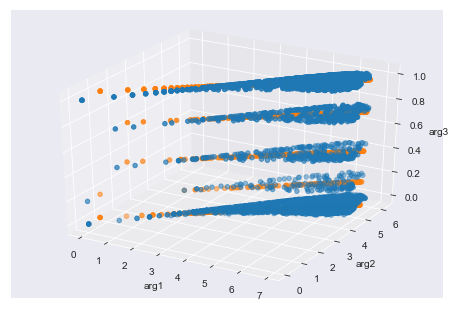

In [152]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'], preds)

In [156]:
preds, resids = show_model_metrics_logBackTrans(X, df1_psm_2017['DHI'], clf_wls_log_log)

******LOG BACK TRANSFORMED METRICS
rmse is  78.22727224933875
r2 is  0.2604466092612302
mean absolute error is  57.053862437818715
mean squared log error is  0.2507404083931255
median absolute error is  45.396499325026326
MAPE is  44.71283474652505


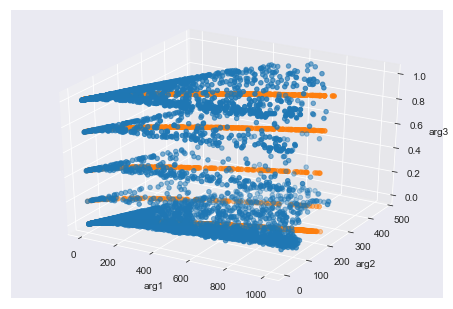

In [157]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI'], df1_psm_2017['Cloud Cover'], preds)

## OLS on Log-Log-Logit

In [161]:
from scipy.special import logit

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

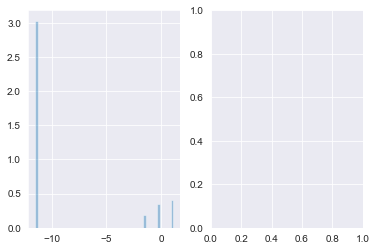

In [162]:
logit_vals = (df1_psm_2017['Cloud Cover'].values)
for i in range(len(logit_vals)):
    if logit_vals[i] ==0:
        logit_vals[i]+=0.00001
    elif logit_vals[i]==1:
        logit_vals[i]-=0.00001
logit_vals = logit(logit_vals)


sns.set_style('darkgrid')
fig, axs = plt.subplots(ncols=2)
sns.distplot(logit_vals, ax=axs[0])
sns.distplot(df1_psm_2017['Cloud Cover'], ax=axs[1])
